<a href="https://colab.research.google.com/github/debg48/Driver_Alert/blob/main/driver_alert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course Project - Zero to GBMs

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('driver-alert')
jovian.set_colab_id('1Bvl3vCe-xam3H_DRyB1SRVef_fK_2z67')

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="driver-alert")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/debg48/driver-alert


'https://jovian.ai/debg48/driver-alert'

# Driver Alertness

Driving while distracted, fatigued or drowsy may lead to accidents. Activities that divert the driver's attention from the road ahead, such as engaging in a conversation with other passengers in the car, making or receiving phone calls, sending or receiving text messages, eating while driving or events outside the car may cause driver distraction. Fatigue and drowsiness can result from driving long hours or from lack of sleep.

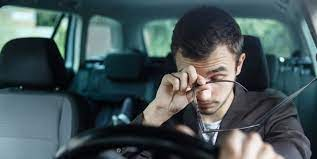

## Downloading Data

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
dataset_url = 'https://www.kaggle.com/c/stayalert'

In [ ]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./stayalert" (use force=True to force download)


In [ ]:
data_dir = './stayalert'

In [ ]:
import os
os.listdir(data_dir)

['fordTest.csv', 'Solution.csv', 'example_submission.csv', 'fordTrain.csv']

## Data Preparation and Cleaning

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
driver_train_df = pd.read_csv(data_dir + '/fordTrain.csv')

In [ ]:
driver_test_df = pd.read_csv(data_dir + '/fordTest.csv')

In [ ]:
solution_df =  pd.read_csv(data_dir + '/Solution.csv')

In [ ]:
ex_sub_df = pd.read_csv(data_dir + '/example_submission.csv')

In [ ]:
driver_train_df

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


In [ ]:
driver_test_df

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.94350,1000,60.0000,0.302277,508,118.1100,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.32120,1000,60.0000,0.302277,508,118.1100,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.51400,1000,60.0000,0.302277,508,118.1100,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.26150,1000,60.0000,0.302277,508,118.1100,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.36660,1000,60.0000,0.302277,504,119.0480,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,99,1206,?,37.3798,17.40260,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,658,0,0.0,0,1,16.6850
120836,99,1207,?,37.1653,5.37419,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,657,0,0.0,0,1,16.6840
120837,99,1208,?,36.9131,9.26657,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,655,0,0.0,0,1,16.6487
120838,99,1209,?,36.6297,10.41710,892,67.2646,0.131030,752,79.7872,...,-0.07,240,0.00000,0,657,0,0.0,0,1,16.6314


In [ ]:
driver_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

As we can observe there are no categorical columns and no missing values

In [ ]:
driver_train_df.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [ ]:
driver_train_df.isnull().sum()

TrialID    0
ObsNum     0
IsAlert    0
P1         0
P2         0
P3         0
P4         0
P5         0
P6         0
P7         0
P8         0
E1         0
E2         0
E3         0
E4         0
E5         0
E6         0
E7         0
E8         0
E9         0
E10        0
E11        0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
dtype: int64

In [ ]:
driver_train_df.columns

Index(['TrialID', 'ObsNum', 'IsAlert', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
       'P7', 'P8', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
       'E11', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11'],
      dtype='object')

In [ ]:
for column in driver_train_df.columns:
  print(column + ' : ')
  print(np.unique(driver_train_df[column]))
  print('\n')

TrialID : 
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243

Since V7,V9 and P8 contain only one value 0 we will drop these columns

In [ ]:
driver_train_df.drop('V9', inplace=True, axis=1)

In [ ]:
driver_train_df.drop('V7', inplace=True, axis=1)

In [ ]:
driver_train_df.drop('P8', inplace=True, axis=1)

In [ ]:
driver_train_df

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,...,0.0,101.96,0.175,752,5.99375,0,2005,13.4,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,...,0.0,101.98,0.455,752,5.99375,0,2007,13.4,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,...,0.0,101.97,0.280,752,5.99375,0,2011,13.4,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,...,0.0,101.99,0.070,752,5.99375,0,2015,13.4,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,...,0.0,102.07,0.175,752,5.99375,0,2017,13.4,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,...,0.0,91.51,0.280,240,3.01875,0,1801,30.4,4,15.8113
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,...,0.0,91.51,0.280,240,3.01875,0,1801,30.4,4,15.8018
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,...,0.0,91.56,0.175,240,3.01875,0,1800,31.3,4,15.8120
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,...,0.0,91.56,0.175,240,3.01875,0,1800,31.3,4,15.8270


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/debg48/driver-alert


'https://jovian.ai/debg48/driver-alert'

## Exploratory Ananlysis and Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

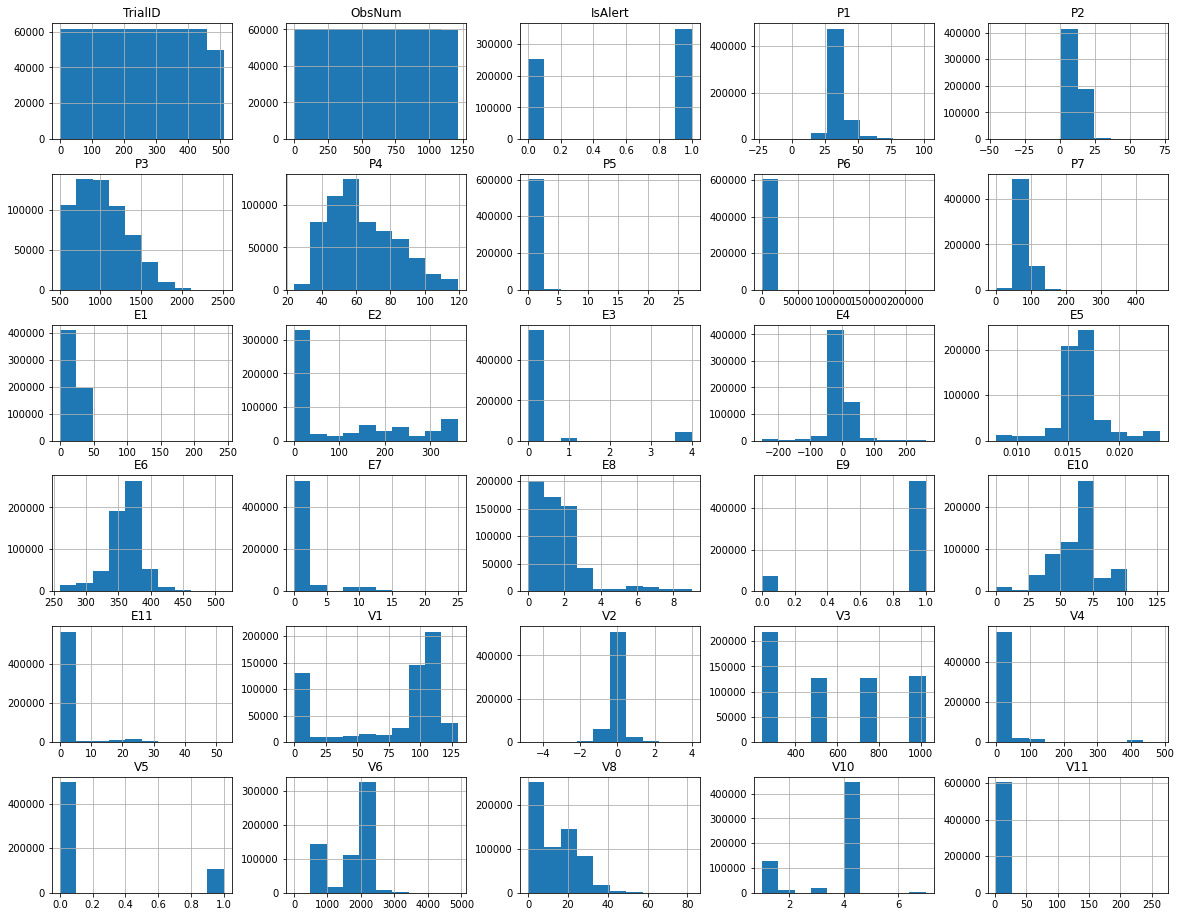

In [ ]:
driver_train_df.hist(figsize = (20,16))
plt.show()

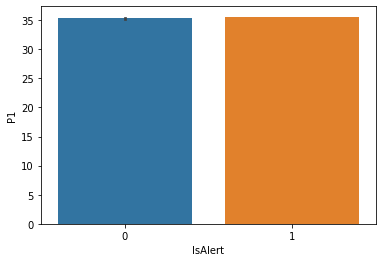

In [ ]:
sns.barplot(x='IsAlert', y='P1', data= driver_train_df);

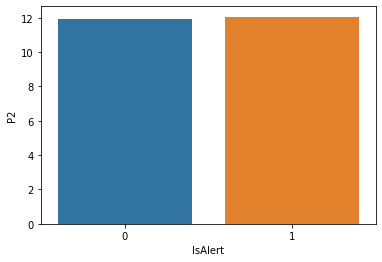

In [ ]:
sns.barplot(x='IsAlert', y='P2', data= driver_train_df);

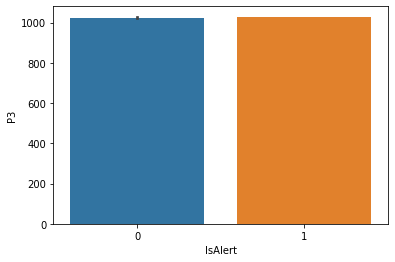

In [ ]:
sns.barplot(x='IsAlert', y='P3', data= driver_train_df);

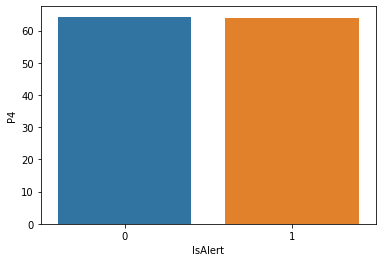

In [ ]:
sns.barplot(x='IsAlert', y='P4', data= driver_train_df);

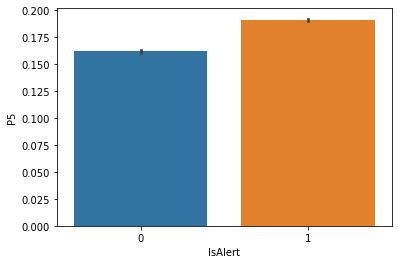

In [ ]:
sns.barplot(x='IsAlert', y='P5', data= driver_train_df);

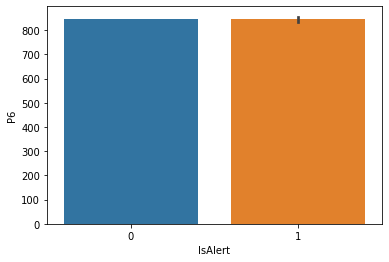

In [ ]:
sns.barplot(x='IsAlert', y='P6', data= driver_train_df);

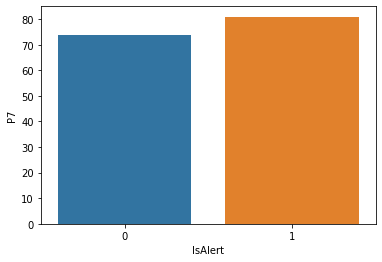

In [ ]:
sns.barplot(x='IsAlert', y='P7', data= driver_train_df);

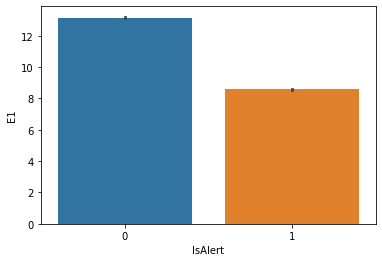

In [ ]:
sns.barplot(x='IsAlert', y='E1', data= driver_train_df);

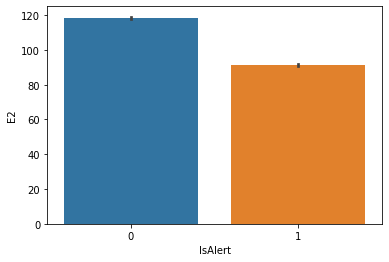

In [ ]:
sns.barplot(x='IsAlert', y='E2', data= driver_train_df);

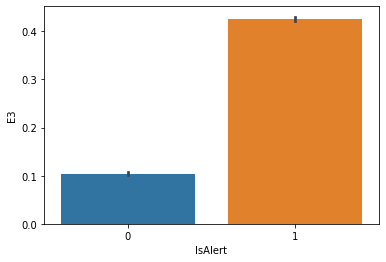

In [ ]:
sns.barplot(x='IsAlert', y='E3', data= driver_train_df);

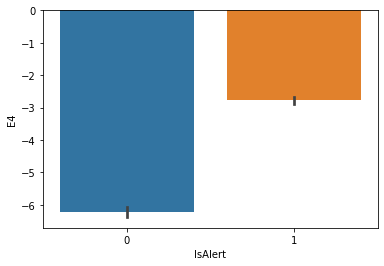

In [ ]:
sns.barplot(x='IsAlert', y='E4', data= driver_train_df);

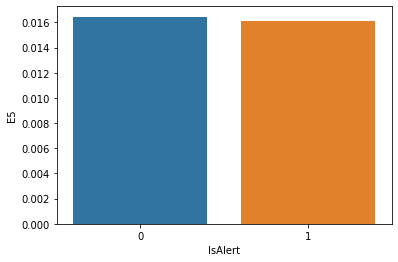

In [ ]:
sns.barplot(x='IsAlert', y='E5', data= driver_train_df);

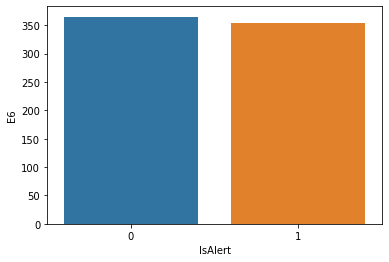

In [ ]:
sns.barplot(x='IsAlert', y='E6', data= driver_train_df);

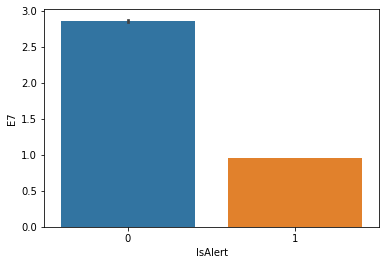

In [ ]:
sns.barplot(x='IsAlert', y='E7', data= driver_train_df);

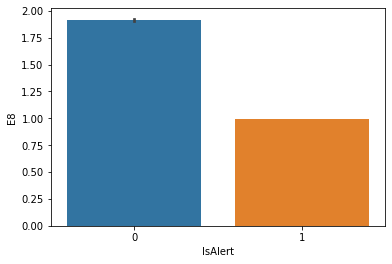

In [ ]:
sns.barplot(x='IsAlert', y='E8', data= driver_train_df);

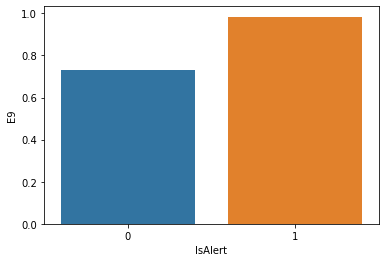

In [ ]:
sns.barplot(x='IsAlert', y='E9', data= driver_train_df);

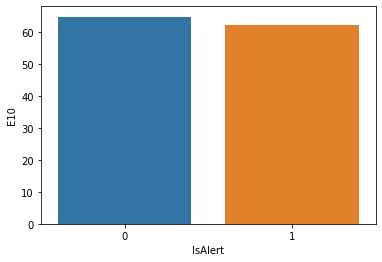

In [ ]:
sns.barplot(x='IsAlert', y='E10', data= driver_train_df);

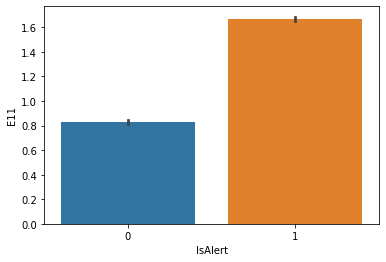

In [ ]:
sns.barplot(x='IsAlert', y='E11', data= driver_train_df);

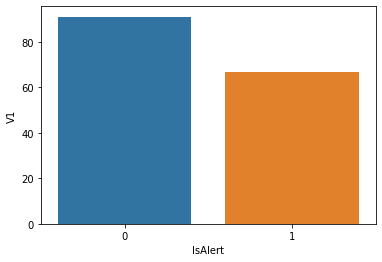

In [ ]:
sns.barplot(x='IsAlert', y='V1', data= driver_train_df);

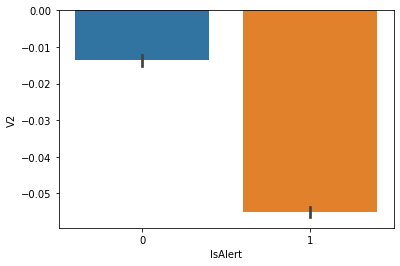

In [ ]:
sns.barplot(x='IsAlert', y='V2', data= driver_train_df);

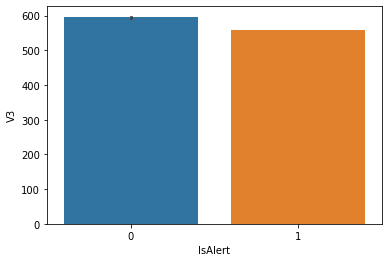

In [ ]:
sns.barplot(x='IsAlert', y='V3', data= driver_train_df);

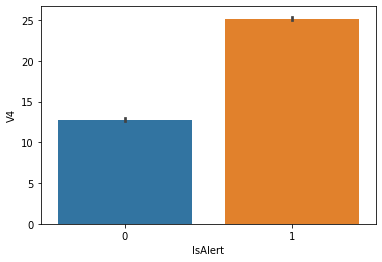

In [ ]:
sns.barplot(x='IsAlert', y='V4', data= driver_train_df);

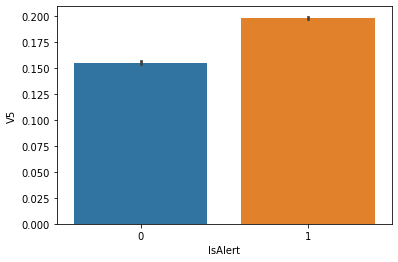

In [ ]:
sns.barplot(x='IsAlert', y='V5', data= driver_train_df);

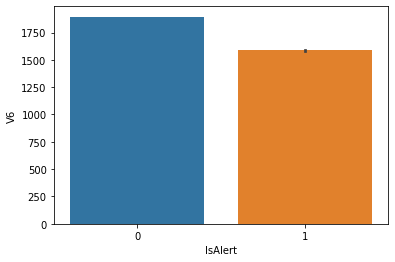

In [ ]:
sns.barplot(x='IsAlert', y='V6', data= driver_train_df);

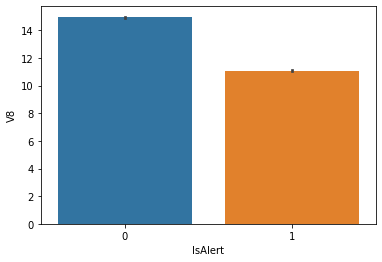

In [ ]:
sns.barplot(x='IsAlert', y='V8', data= driver_train_df);

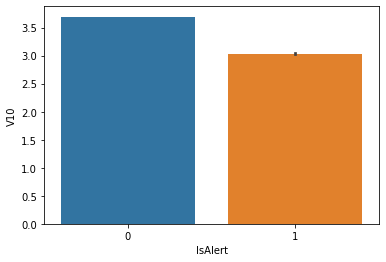

In [ ]:
sns.barplot(x='IsAlert', y='V10', data= driver_train_df);

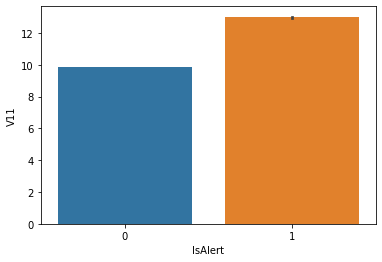

In [ ]:
sns.barplot(x='IsAlert', y='V11', data= driver_train_df);

In [ ]:
corr = driver_train_df.corr()

In [ ]:
corr

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
TrialID,1.000000,-0.000162,-0.145816,0.016772,-0.004473,0.000369,0.001880,0.022632,0.005377,0.111903,...,0.073676,-0.117728,0.065063,0.001900,-0.074320,0.123721,-0.097389,-0.047593,-0.093818,0.078887
ObsNum,-0.000162,1.000000,-0.005143,0.018324,-0.001764,0.002199,-0.001191,0.005568,-0.015791,0.003498,...,0.004978,0.004242,0.019009,0.007753,-0.000480,-0.006284,0.003935,0.008191,0.005145,-0.011465
IsAlert,-0.145816,-0.005143,1.000000,0.018361,0.014383,0.005168,-0.008177,0.038160,-0.000400,0.189796,...,0.079002,-0.269967,-0.050740,-0.062000,0.097022,0.055429,-0.244150,-0.165550,-0.259607,0.155722
P1,0.016772,0.018324,0.018361,1.000000,-0.006674,-0.010317,0.011704,0.010911,0.045429,0.027461,...,0.015882,-0.025763,-0.021118,0.002551,0.021404,0.051348,-0.019792,-0.029747,-0.004563,0.344636
P2,-0.004473,-0.001764,0.014383,-0.006674,1.000000,-0.002539,0.002132,0.008390,-0.022003,0.052171,...,0.001857,0.011310,0.001779,0.002272,-0.006038,-0.023902,0.010608,0.008257,0.001946,-0.034248
P3,0.000369,0.002199,0.005168,-0.010317,-0.002539,1.000000,-0.944435,0.035129,0.012444,-0.006097,...,0.007423,-0.011347,0.008651,-0.006380,0.013045,0.001312,-0.010245,-0.007963,-0.009630,-0.009808
P4,0.001880,-0.001191,-0.008177,0.011704,0.002132,-0.944435,1.000000,-0.032897,-0.010627,0.007323,...,-0.005681,0.010061,-0.006926,0.008049,-0.010905,0.001705,0.008348,0.005379,0.008906,0.009841
P5,0.022632,0.005568,0.038160,0.010911,0.008390,0.035129,-0.032897,1.000000,0.002314,-0.023628,...,0.028216,-0.054428,0.026232,0.005371,0.070290,-0.016671,-0.046353,-0.023359,-0.022193,-0.004897
P6,0.005377,-0.015791,-0.000400,0.045429,-0.022003,0.012444,-0.010627,0.002314,1.000000,-0.125580,...,-0.008939,-0.024449,-0.010418,-0.004996,0.019121,0.029222,-0.025728,-0.016850,-0.002163,0.012783
P7,0.111903,0.003498,0.189796,0.027461,0.052171,-0.006097,0.007323,-0.023628,-0.125580,1.000000,...,0.084846,-0.043512,0.025850,0.007986,0.037711,0.024499,-0.020696,-0.008450,-0.041814,0.019360


## Preparing Data for Training

In [ ]:
input_cols, target_col = driver_train_df.columns[3::], 'IsAlert'

In [ ]:
input_cols

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'E1', 'E2', 'E3', 'E4', 'E5',
       'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'V1', 'V2', 'V3', 'V4', 'V5',
       'V6', 'V8', 'V10', 'V11'],
      dtype='object')

In [ ]:
target_col

'IsAlert'

In [ ]:
inputs_df, targets = driver_train_df[input_cols].copy(), driver_train_df[target_col].copy()

Imputing and Scaling Columns

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

imputer = SimpleImputer().fit(inputs_df[input_cols])
inputs_df[input_cols] = imputer.transform(inputs_df[input_cols])
scaler = MinMaxScaler().fit(inputs_df[input_cols])
inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])

In [ ]:
inputs_df[input_cols]

,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,...,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
0,0.462091,0.474947,0.446215,0.199362,0.009265,0.001942,0.223342,0.000000,0.000000,0.25,...,0.0,0.786122,0.565737,0.653895,0.012371,0.0,0.409853,0.163216,0.5,0.050310
1,0.459515,0.505470,0.446215,0.199362,0.009265,0.001942,0.223342,0.000000,0.000000,0.25,...,0.0,0.786276,0.597610,0.653895,0.012371,0.0,0.410262,0.163216,0.5,0.050204
2,0.458894,0.520658,0.446215,0.199362,0.009265,0.001959,0.221788,0.000000,0.000000,0.25,...,0.0,0.786199,0.577689,0.653895,0.012371,0.0,0.411079,0.163216,0.5,0.050207
3,0.458873,0.466394,0.446215,0.199362,0.009265,0.001959,0.221788,0.000000,0.000000,0.25,...,0.0,0.786353,0.553785,0.653895,0.012371,0.0,0.411897,0.163216,0.5,0.050181
4,0.458793,0.516499,0.446215,0.199362,0.009265,0.001959,0.221788,0.000000,0.000000,0.25,...,0.0,0.786970,0.565737,0.653895,0.012371,0.0,0.412306,0.163216,0.5,0.050215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,0.440001,0.477399,0.147410,0.537130,0.001576,0.002414,0.187781,0.072982,0.616981,0.00,...,0.0,0.705551,0.577689,0.000000,0.006231,0.0,0.368152,0.370280,0.5,0.054185
604325,0.440277,0.497245,0.147410,0.537130,0.001576,0.002414,0.187781,0.072982,0.616981,0.00,...,0.0,0.705551,0.577689,0.000000,0.006231,0.0,0.368152,0.370280,0.5,0.054149
604326,0.440575,0.476795,0.147410,0.537130,0.001576,0.002414,0.187781,0.072982,0.616981,0.00,...,0.0,0.705937,0.565737,0.000000,0.006231,0.0,0.367948,0.381242,0.5,0.054188
604327,0.440892,0.543430,0.147410,0.537130,0.001576,0.002414,0.187781,0.072982,0.616981,0.00,...,0.0,0.705937,0.565737,0.000000,0.006231,0.0,0.367948,0.381242,0.5,0.054245


In [ ]:
from sklearn.model_selection import train_test_split

train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[input_cols], targets, test_size=0.25, random_state=42)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/debg48/driver-alert


'https://jovian.ai/debg48/driver-alert'

## Training Model

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression(max_iter=1000)

In [ ]:
%%time
log_model.fit(train_inputs, train_targets)

CPU times: user 50.9 s, sys: 20.9 s, total: 1min 11s
Wall time: 49.4 s


LogisticRegression(max_iter=1000)

In [ ]:
log_train_score=log_model.score(train_inputs,train_targets)

In [ ]:
log_val_score = log_model.score(val_inputs,val_targets)

In [ ]:
print('Train Loss: {}, Validation Loss: {}'.format(1-log_train_score, 1-log_val_score))

Train Loss: 0.20871006032044404, Validation Loss: 0.20889842007373427


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
%%time
tree.fit(train_inputs,train_targets)

CPU times: user 13.1 s, sys: 26.7 ms, total: 13.1 s
Wall time: 13 s


DecisionTreeClassifier()

In [ ]:
tree_train_score=tree.score(train_inputs,train_targets)

In [ ]:
tree_val_score=tree.score(val_inputs,val_targets)

In [ ]:
print('Train Loss: {}, Validation Loss: {}'.format(1-tree_train_score, 1-tree_val_score))

Train Loss: 0.0, Validation Loss: 0.01286709954131171


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf1 = RandomForestClassifier(n_jobs=1,random_state=42)

In [ ]:
%%time
rf1.fit(train_inputs,train_targets)

CPU times: user 3min 11s, sys: 335 ms, total: 3min 11s
Wall time: 3min 11s


RandomForestClassifier(n_jobs=1, random_state=42)

In [ ]:
rf1_train_score=rf1.score(train_inputs,train_targets)

In [ ]:
rf1_val_score=rf1.score(val_inputs,val_targets)

In [ ]:
print('Train Loss: {}, Validation Loss: {}'.format(1-rf1_train_score, 1-rf1_val_score))

Train Loss: 0.0, Validation Loss: 0.006294553324993513


#### Hyperparameter Tunning

In [ ]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=1, **params).fit(train_inputs, train_targets)
    return model.score(train_inputs, train_targets), model.score(val_inputs,val_targets)

In [ ]:
test_params(n_estimators=100)

(1.0, 0.9937054466750065)

In [ ]:
test_params(n_estimators=200)

(1.0, 0.9938973941475877)

In [ ]:
test_params(n_estimators=50)

(0.9999911747704338, 0.9936127823778983)

In [ ]:
test_params(n_estimators=30, max_depth=10)

(0.9093031157472984, 0.9075541258778287)

In [ ]:
test_params(n_estimators=30, max_depth=20)

(0.9784598209360921, 0.9734980110270514)

In [ ]:
test_params(n_estimators=30, max_depth=30)

(0.9991108581211969, 0.9913027938285578)

In [ ]:
test_params(n_estimators=30, max_depth=40)

(0.999984555848259, 0.9935796879860739)

In [ ]:
test_params(n_estimators=30, max_depth=5, min_samples_leaf=10)

(0.847705219682027, 0.8482886889987623)

In [ ]:
test_params(n_estimators=30, max_depth=5, min_samples_leaf=5)

(0.8505270868358463, 0.8507972438990489)

In [ ]:
test_params(n_estimators=30, max_depth=5, min_samples_leaf=1)

(0.8505425309875874, 0.8508171005341435)

In [ ]:
test_params(n_estimators=30, max_depth=5, min_samples_leaf=0.5)

(0.5787364918829951, 0.5789863849672034)

In [ ]:
test_params(n_estimators=100, max_depth=40, min_samples_leaf=1)

(1.0, 0.9937120655533713)

In [ ]:
test_params(n_estimators=100, max_depth=30, min_samples_leaf=1)

(0.9995565322142942, 0.9915344545713284)

In [ ]:
rf2 = RandomForestClassifier(n_jobs=1,random_state=42,n_estimators=100, max_depth=40, min_samples_leaf=1)

In [ ]:
%%time
rf2.fit(train_inputs,train_targets)

CPU times: user 2min 57s, sys: 664 ms, total: 2min 58s
Wall time: 2min 57s


RandomForestClassifier(max_depth=40, n_jobs=1, random_state=42)

In [ ]:
rf2_train_score=rf2.score(train_inputs,train_targets)

In [ ]:
rf2_val_score=rf2.score(val_inputs,val_targets)

In [ ]:
print('Train Loss: {}, Validation Loss: {}'.format(1-rf2_train_score, 1-rf2_val_score))

Train Loss: 0.0, Validation Loss: 0.0062879344466286735


### Gradient Bossting Machine

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb1 = XGBClassifier(random_state=42, n_jobs=-1)

In [ ]:
%%time
xgb1.fit(train_inputs, train_targets)

CPU times: user 1min 29s, sys: 192 ms, total: 1min 29s
Wall time: 47.2 s


XGBClassifier(n_jobs=-1, random_state=42)

In [ ]:
xgb1_train_score=xgb1.score(train_inputs,train_targets)

In [ ]:
xgb1_val_score=xgb1.score(val_inputs,val_targets)

In [ ]:
print('Train Loss: {}, Validation Loss: {}'.format(1-xgb1_train_score, 1-xgb1_val_score))

Train Loss: 0.11147588726651747, Validation Loss: 0.1113692473673411


#### Hyperparameter Tuning

In [ ]:
def test_params(**params):
    model1 = XGBClassifier(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    return model1.score(train_inputs, train_targets), model1.score(val_inputs,val_targets)

In [ ]:
test_params(n_estimators=100)

(0.8885241127334825, 0.8886307526326589)

In [ ]:
test_params(n_estimators=50)

(0.8698587522007917, 0.8697735681711377)

In [ ]:
test_params(n_estimators=200)

(0.903683650820967, 0.9029540054142425)

In [ ]:
test_params(n_estimators=300)

(0.9106092497231084, 0.9101553450752236)

In [ ]:
test_params(n_estimators=30, max_depth=10)

(0.9493167066008305, 0.9472210639185084)

In [ ]:
test_params(n_estimators=30, max_depth=20)

(0.9894075182130675, 0.9820363641177366)

In [ ]:
test_params(n_estimators=30, max_depth=5)

(0.8874297842672633, 0.8877372040534011)

In [ ]:
test_params(n_estimators=30, max_depth=30)

(0.9987071038685393, 0.9898135461964616)

In [ ]:
test_params(n_estimators=30, max_depth=5, min_samples_leaf=10)

(0.8874297842672633, 0.8877372040534011)

In [ ]:
test_params(n_estimators=30, max_depth=5, min_samples_leaf=5)

(0.8874297842672633, 0.8877372040534011)

In [ ]:
test_params(n_estimators=200, max_depth=30)

(1.0, 0.9954263550498732)

In [ ]:
xgb2 = XGBClassifier(random_state=42, n_jobs=-1,n_estimators=200, max_depth=30)

In [ ]:
%%time
xgb2.fit(train_inputs, train_targets)

CPU times: user 38min 35s, sys: 2.97 s, total: 38min 38s
Wall time: 20min 6s


XGBClassifier(max_depth=30, n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
xgb2_train_score=xgb2.score(train_inputs,train_targets)

In [ ]:
xgb2_val_score=xgb2.score(val_inputs,val_targets)

In [ ]:
print('Train Loss: {}, Validation Loss: {}'.format(1-xgb2_train_score, 1-xgb2_val_score))

Train Loss: 0.0, Validation Loss: 0.004573644950126798


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/debg48/driver-alert


'https://jovian.ai/debg48/driver-alert'

## Training the Final Model 

As the loss of GBM was least we will pick up Random Forest as our final model

In [ ]:
model = XGBClassifier(random_state=42, n_jobs=-1,n_estimators=200, max_depth=30)

In [ ]:
%%time
model.fit(train_inputs,train_targets)

CPU times: user 37min 46s, sys: 2.94 s, total: 37min 48s
Wall time: 19min 29s


XGBClassifier(max_depth=30, n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
train_predicts = model.predict(train_inputs)

In [ ]:
model.score(train_inputs,train_targets)

1.0

## Saving the Model

In [ ]:
import joblib

In [ ]:
driver_rf = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'input_cols': input_cols,
    'target_col': target_col,
}

In [ ]:
joblib.dump(driver_rf, 'driver_rf.joblib')

['driver_rf.joblib']

In [ ]:
jovian.commit(outputs='driver_rf.joblib')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
Committed successfully! https://jovian.ai/debg48/driver-alert


'https://jovian.ai/debg48/driver-alert'

## Conclusion and Reference

The model was trained using Random Forest Classifer 

Summary :

* The dataset was taken from Kaggle
* Data Cleaning and Processing steps were performed
* Different Model were trained and their RMSE was checked
* The final model was trained and saved
<br>
<br>

References :

* https://www.kaggle.com/
* https://online.stat.psu.edu/stat508/lesson/analysis-wine-quality-data
<br>
<br>

Future Work :

* We can train different Deep Learning Models and check the accuracy

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/debg48/driver-alert


'https://jovian.ai/debg48/driver-alert'